In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
data = pd.read_csv('datarumah.csv',usecols=['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built'])

In [74]:
data

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
0,221900.0,3,1,1180,1.0,7,1955
1,538000.0,3,2,2570,2.0,7,1951
2,180000.0,2,1,770,1.0,6,1933
3,604000.0,4,3,1960,1.0,7,1965
4,510000.0,3,2,1680,1.0,8,1987
...,...,...,...,...,...,...,...
21608,360000.0,3,2,1530,3.0,8,2009
21609,400000.0,4,2,2310,2.0,8,2014
21610,402101.0,2,0,1020,2.0,7,2009
21611,400000.0,3,2,1600,2.0,8,2004


In [59]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,13.000000,2015.000000


In [60]:
data['bathrooms'] = data['bathrooms'].astype('int')

In [61]:
data['bedrooms'] = data['bedrooms'].replace(33,3)

In [62]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.369454,1.749734,2079.899736,1.494309,7.656873,1971.005136
std,3.671272e+05,0.907964,0.734873,918.440897,0.539989,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.000000,1427.000000,1.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.000000,1910.000000,1.500000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.000000,2550.000000,2.000000,8.000000,1997.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,3.500000,13.000000,2015.000000


In [63]:
data.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
floors         0
grade          0
yr_built       0
dtype: int64

In [64]:
data.corr().style.set_precision(2)

,price,bedrooms,bathrooms,sqft_living,floors,grade,yr_built
price,1.00,0.32,0.51,0.70,0.26,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.18,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.47,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.35,0.76,0.32
floors,0.26,0.18,0.47,0.35,1.00,0.46,0.49
grade,0.67,0.37,0.61,0.76,0.46,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.49,0.45,1.00


In [75]:
# mendefinisikan data x dan y
# x = bedrooms,bathrooms,sqft_living,floors, grade, dan yr_built
# y = price

x = data.drop(columns='price')
y = data['price']

In [76]:
# split data menjadi 80 train data dan 20 test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [77]:
# cek shap dari masing-masing data

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(17290, 6)
(17290,)
(4323, 6)
(4323,)


In [78]:
# selanjutnya kita buat model linear regression nya

lin_reg = LinearRegression()

In [79]:
# lalu kita train model dengan data train

lin_reg.fit(x_train, y_train)

LinearRegression()

In [80]:
# kemudian kita cek nilai a dan b,c,d.... dan K yang terbentuk pada persamaan y = ax + bx + cx....zx + K

print(lin_reg.coef_)
print(lin_reg.intercept_)

[-52768.52992713  60902.58805546    190.10569459  17364.30093003
 129318.0014135   -4063.09734348]
7208221.989590492


In [81]:
# agar tampilan lebih mudah dibaca

coef_dict = {
    'features': x.columns,
    'coef_value':lin_reg.coef_
}
coef = pd.DataFrame(coef_dict, columns=['features', 'coef_value'])
coef

,features,coef_value
0,bedrooms,-52768.529927
1,bathrooms,60902.588055
2,sqft_living,190.105695
3,floors,17364.300930
4,grade,129318.001414
5,yr_built,-4063.097343


In [82]:
# kita lihat seberapa akurat model yg kita buat tersebut

lin_reg.score(x_test, y_test)

0.6129167306116222

In [84]:
# kita coba prediksi dengan data sbb
# bedrooms = 3, bathrooms = 2, sqft_living = 1500, floors = 2, grade = 7, yr_built = 1995

lin_reg.predict([[3,2,1500,2,7,1995]])

array([290955.52931743])

Text(0.5, 1.0, 'Plot Horsepower vs Price')

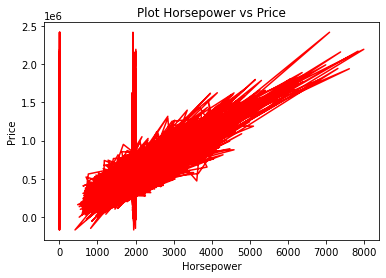

In [86]:
y_prediksi = lin_reg.predict(x_test)
#plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')